__matlab数据格式转换、存储__

In [4]:
import scipy.io as io
import numpy as np
import torch
data = io.loadmat('../topdata/topdata_1/topdata_1.mat')       #从.mat文件中读出的数据类型是：dict
data = data['ans']                                            #从.mat文件的键值对ans中读出数据数组，类型为ndarray
np.printoptions(suppress = True)
print(data)
print(data.shape)

tensor_data = torch.tensor(data)                              #将数据转换为tensor类型
print(tensor_data.shape)
#np.save('../topdata/topdata_2/topdata_2.npy',data)           #将数据以“topdata_2.npy”的名称格式保存在topdata/topdata_2文件夹下

[[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000

注意：  
1.numpy数据存储格式是:(y, x, z);而tensor存储格式是:(z, y, x),必要时需要转换  
2.保存matlab工作区数据格式：命令行输入：save('保存路径/文件名','工作区数据名')

__3D体素数据可视化__

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14552881eb0>,
 (0, 0, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1455288c8e0>,
 (0, 0, 11): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1455289ba90>,
 (0, 0, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1455289be50>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b24250>,
 (0, 1, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b24610>,
 (0, 1, 11): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b249d0>,
 (0, 1, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b24d90>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b32190>,
 (0, 2, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b32550>,
 (0, 2, 11): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b32910>,
 (0, 2, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b32cd0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x14551b3f0d0>,
 (0, 3

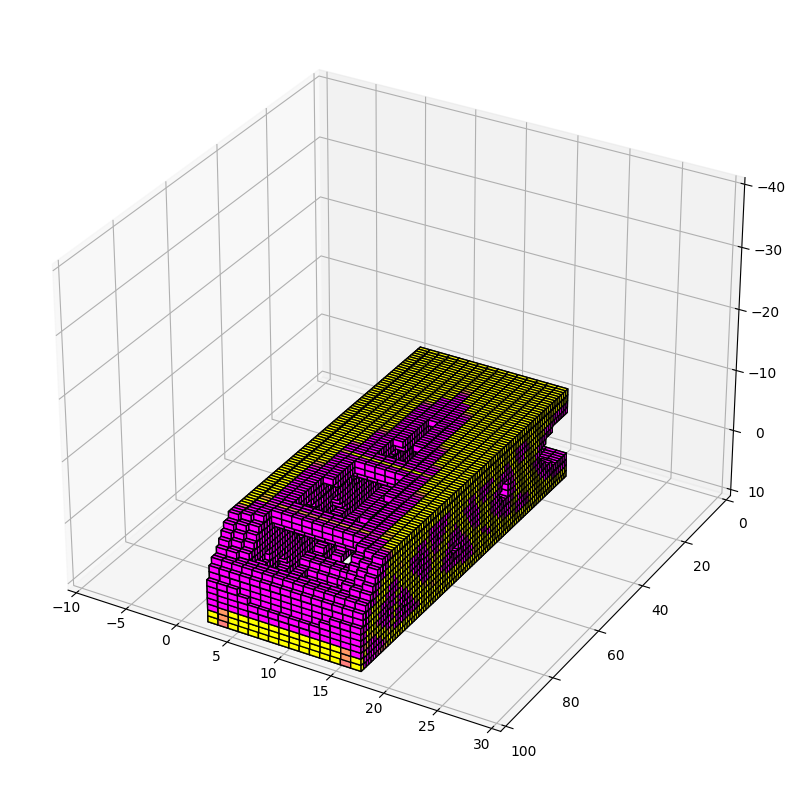

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
xyzvalues = np.load('../topdata/topdata_1/topdata_1.npy')
xyzvalues = xyzvalues.transpose(2, 1, 0)
# print(xyzvalues.shape)
# xyzvalues = xyzvalues.transpose(1, 2, 0)
# print(xyzvalues.shape)

mycolormap = plt.get_cmap('spring')
xyzmaxvalue=xyzvalues.max()
relativevalue=np.round(xyzvalues/xyzmaxvalue,1)
colorsvalues=mycolormap(relativevalue)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-10, 30)   #设置每个轴的刻度大小
ax.set_ylim(100, 0)
ax.set_zlim(10, -40)

ax.xaxis.set_ticks_position('top') 
ax.voxels(xyzvalues, facecolors=colorsvalues, edgecolor='k', shade=False)

注意:  
1.3D绘图数据读取顺序：输入数据ndarray的存储格式是:(y, x, z)/(H, W, C)在数据读取时也是按照y→x→z的顺序读取，存储到(x, y, z)的存储空间中，所以最好将ndarray的维度交换为(x, y, z)再导入

2.3D坐标轴如图所示：


{}

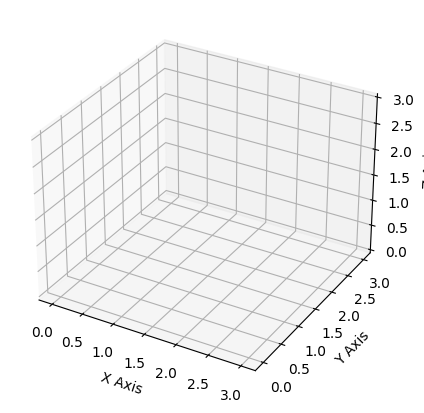

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
data = np.zeros((3, 3, 3))
fig = plt.figure(figsize=(5 ,5))
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.voxels(data)

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456b64dee0>,
 (0, 0, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456b4cfd90>,
 (0, 0, 11): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456b4b2a30>,
 (0, 0, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456b48c910>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456ac85220>,
 (0, 1, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456ac85c40>,
 (0, 1, 11): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456ac85f70>,
 (0, 1, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456af13400>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456af137c0>,
 (0, 2, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456af13b80>,
 (0, 2, 11): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456af13f40>,
 (0, 2, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456af20340>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1456af20700>,
 (0, 3

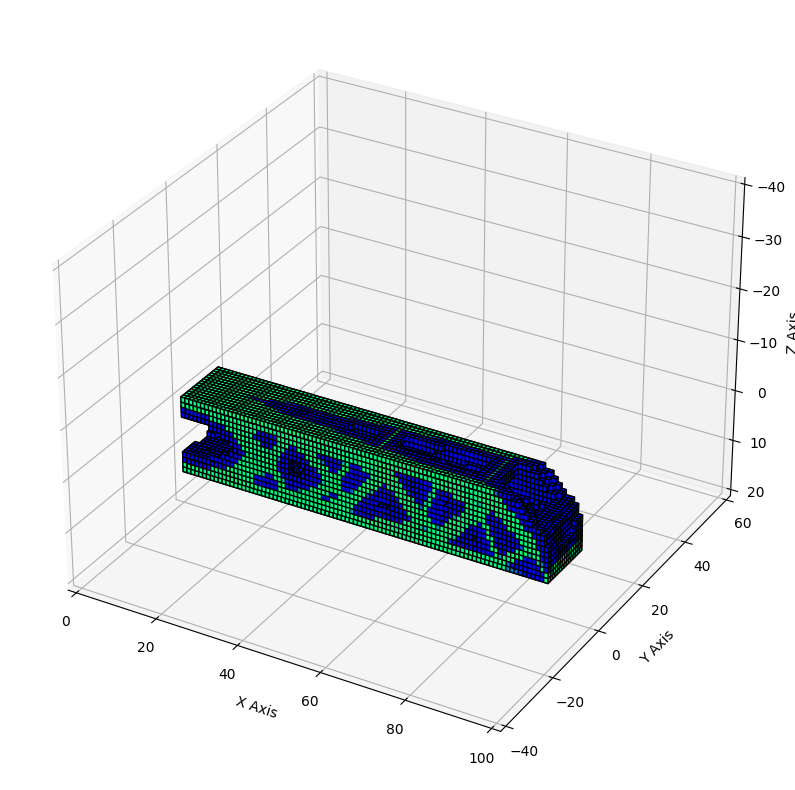

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
xyzvalues = np.load('../topdata/topdata_1/topdata_1.npy')
xyzvalues = xyzvalues.transpose(1, 2, 0)
# print(xyzvalues.shape)
# xyzvalues = xyzvalues.transpose(1, 2, 0)
# print(xyzvalues.shape)

mycolormap = plt.get_cmap('winter')
xyzmaxvalue=xyzvalues.max()
relativevalue=np.round(xyzvalues/xyzmaxvalue,1)
colorsvalues=mycolormap(relativevalue)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 100)   #设置每个轴的刻度大小
ax.set_ylim(-40, 60)
ax.set_zlim(20, -40)


ax.voxels(xyzvalues, facecolors=colorsvalues, edgecolor='k', shade=False)

——————————————————————————————————————————__正  式  实  验  数  据__——————————————————————————————————————————

——————————————————————————————————————————__正  式  实  验  数  据__——————————————————————————————————————————

——————————————————————————————————————————__正  式  实  验  数  据__——————————————————————————————————————————

__1.1  topdata_1标准化输入生成__

In [2]:
import scipy.io as io

input_1 = io.loadmat('F:\top_procdure(matlab_dataset)\procedure\top_0.mat')

OSError: [Errno 22] Invalid argument: 'F:\top_procdure(matlab_dataset)\\procedure\top_0.mat'

__1.1  topdata_1标签生成__

In [12]:
import scipy.io as io
import numpy as np
data = io.loadmat('../topdata/topdata_1/topdata_1.mat')
data = data['ans']
print(data.shape)

x, y, z = 90, 15, 15

for i in range(x):
    for j in range(y):
        for k in range(z):
            if data[j][i][k] > 0.5:
                data[j][i][k] = 1
            else:
                data[j][i][k] = 0
print(data)
np.save('../topdata/topdata_1/topdata_1_label.npy',data)

(15, 90, 15)
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [1. 1. 1. ... 1. 1. 1.]
  [0. 1. 1. ... 1. 1. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 1. 0. 0.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 1. 1. ... 1. 1. 0.]
  [0. 1. 1. ... 1. 1. 0.]
  [1. 0. 1. ... 1. 0. 1.]

__1.2  topodata_1_label  3D可视化__

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a69192b0>,
 (0, 0, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a4f44f70>,
 (0, 0, 13): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a509f370>,
 (0, 0, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a509f730>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a509faf0>,
 (0, 1, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a509feb0>,
 (0, 1, 13): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a50ab2b0>,
 (0, 1, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a50ab670>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a50aba30>,
 (0, 2, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a50abdf0>,
 (0, 2, 13): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a50ba1f0>,
 (0, 2, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a50ba5b0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217a50ba970>,
 (0, 3

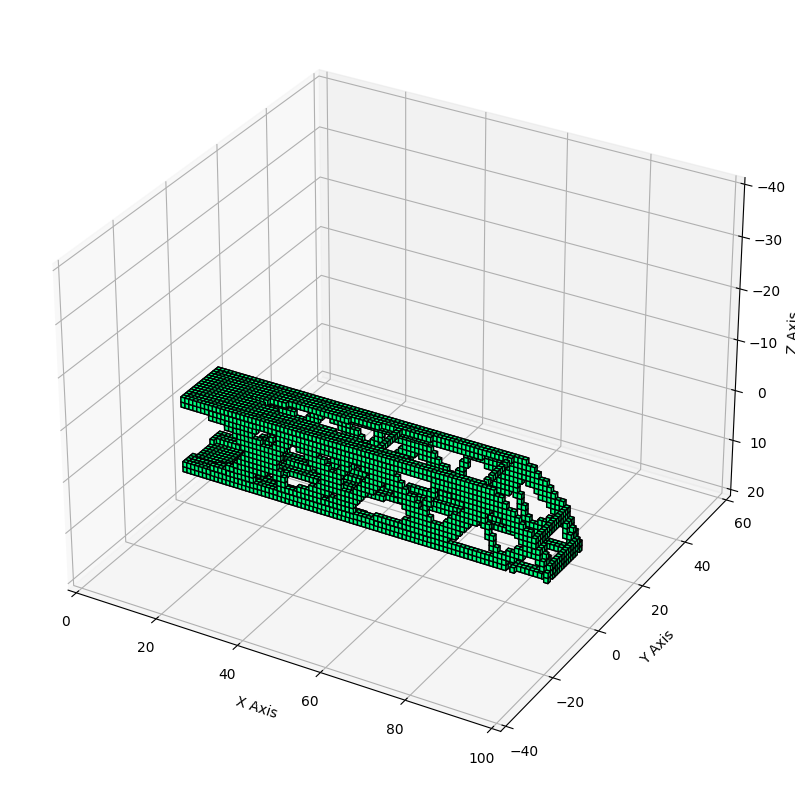

In [14]:
import numpy as np
import matplotlib.pyplot as plt
label_1 = np.load('../topdata/topdata_1/topdata_1_label.npy')
label_1 = label_1.transpose(1, 2, 0)  #(x, z, y)
mycolormap = plt.get_cmap('winter')
label_1_max=label_1.max()
relativevalue=np.round(label_1/label_1_max,1)
colorsvalues=mycolormap(relativevalue)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 100)   #设置每个轴的刻度大小
ax.set_ylim(-40, 60)
ax.set_zlim(20, -40)

ax.voxels(label_1, facecolors=colorsvalues, edgecolor='k', shade=False)

__输入数据__  
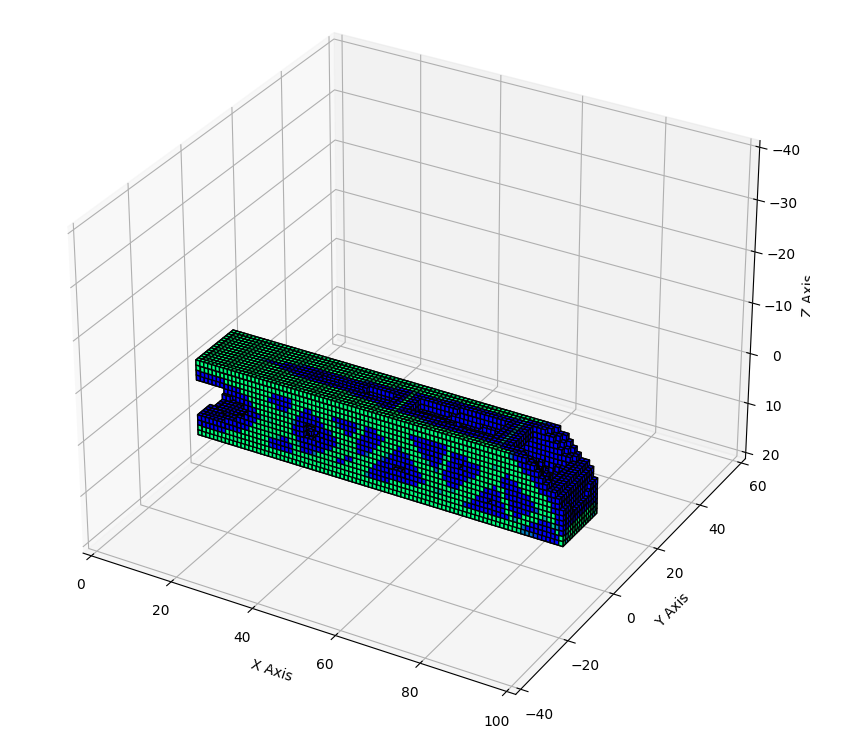

__2.1  topdata_2 标签生成__

In [27]:
import scipy.io as io 

data_2 = io.loadmat('../topdata/topdata_2/topdata_2.mat')
data_2 = data_2['ans']
print(data_2.shape)

x, y, z = 40 ,20 ,40
for i in range(z):
    for j in range(x):
        for k in range(y):
            if data_2[k][j][i] > 0.5:
                data_2[k][j][i] = 1
            else:
                data_2[k][j][i] = 0
np.save('../topdata/topdata_2/topdata_2_label.npy',data_2)

(20, 40, 40)


__2.2  topdata_2_label 3D可视化__

{(0, 0, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c31df5b0>,
 (0, 0, 19): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c37a9370>,
 (0, 1, 13): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c3185760>,
 (0, 1, 19): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c3185970>,
 (0, 2, 13): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c31e7850>,
 (0, 2, 19): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c31f1940>,
 (0, 3, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c31f1d00>,
 (0, 3, 18): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c3318100>,
 (0, 4, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c33184c0>,
 (0, 4, 17): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c3318880>,
 (0, 35, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c3318c40>,
 (0, 35, 17): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c3318f70>,
 (0, 36, 12): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217c332540

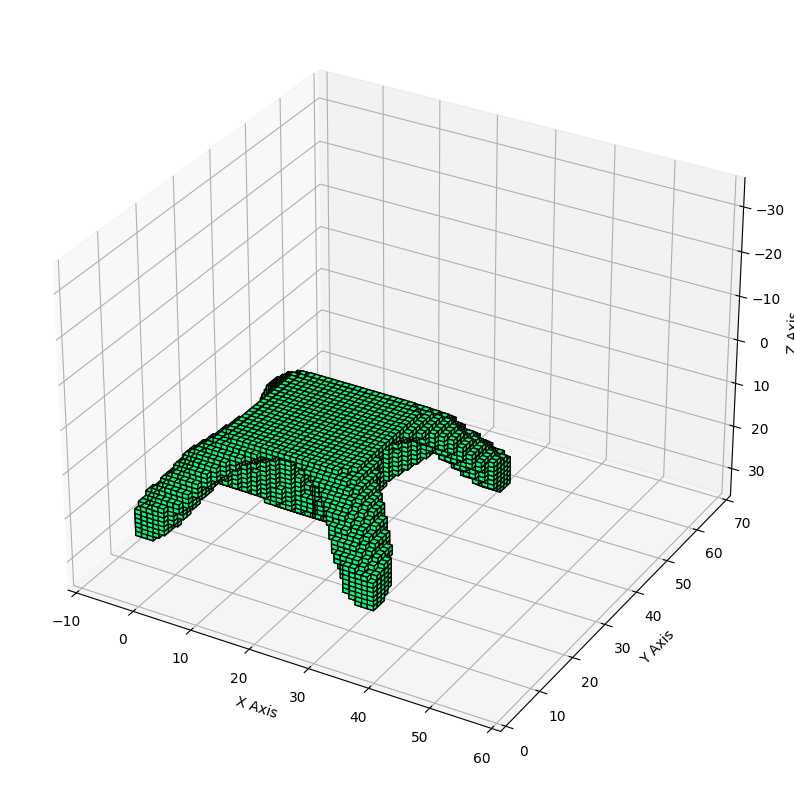

In [28]:
import numpy as np
import matplotlib.pyplot as plt

label_2 = np.load('../topdata/topdata_2/topdata_2_label.npy')
label_2 = label_2.transpose(1, 2, 0)

mycolormap = plt.get_cmap('winter')
label_2_max=label_2.max()
relativevalue=np.round(label_2/label_2_max,1)
colorsvalues=mycolormap(relativevalue)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(-10, 60)   #设置每个轴的刻度大小
ax.set_ylim(0, 70)
ax.set_zlim(35, -35)

ax.voxels(label_2, facecolors=colorsvalues, edgecolor='k', shade=False)

__3.1  topdata_3 标签生成__

In [43]:
import scipy.io as io
import numpy as np
data_3 = io.loadmat('../topdata/topdata_3/topdata_3.mat')
data_3 = data_3['ans']
print(data_3.shape)

x, y, z = 60 ,60 ,4

for i in range(z):
    for j in range(x):
        for k in range(y):
            if data_3[k][j][i] > 0.5:
                data_3[k][j][i] = 1
            else:
                data_3[k][j][i] = 0
np.save('../topdata/topdata_3/topdata_3_label.npy',data_3)

(60, 60, 4)


__3.2  topdata_3_label 3D可视化__

(60, 60, 4)


{(0, 45, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2179197cd30>,
 (0, 45, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x217919885b0>,
 (0, 46, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791988970>,
 (0, 46, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791988d30>,
 (0, 47, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b26130>,
 (0, 47, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b264f0>,
 (0, 48, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b268b0>,
 (0, 48, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b26c70>,
 (0, 49, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b26fa0>,
 (0, 49, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b35430>,
 (0, 50, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b357f0>,
 (0, 50, 3): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b35bb0>,
 (0, 51, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21791b35f70>,

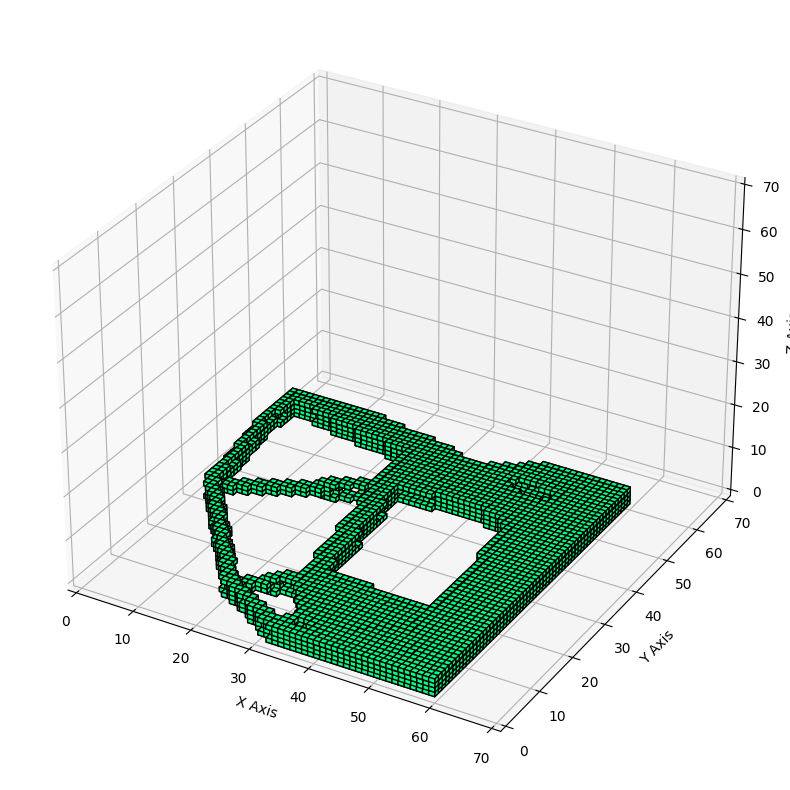

In [11]:
import numpy as np
import matplotlib.pyplot as plt

label_3 = np.load('../topdata/topdata_3/topdata_3_label.npy')
label_3 = label_3.transpose(1, 0, 2)   #(x, y, z)
print(label_3.shape)
mycolormap = plt.get_cmap('winter')
label_3_max=label_3.max()
relativevalue=np.round(label_3/label_3_max,1)
colorsvalues=mycolormap(relativevalue)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 70)   #设置每个轴的刻度大小
ax.set_ylim(0, 70)
ax.set_zlim(0, 70)

ax.voxels(label_3, facecolors=colorsvalues, edgecolor='k', shade=False)

In [30]:
import scipy.io as io
import numpy as np
data = io.loadmat('../top_original_files/test_data/top3d_Cantilever_new.mat')
data = data['ans']
#print(data.shape)
# x, y, z = 120, 40 ,30
# for i in range(y):
#     for j in range(x):
#         for k in range(z):
#             if data[i][j][k] >0.5:
#                 data[i][j][k] = 1
#             else:
#                 data[i][j][k] = 0
# print(data)
np.save('../top_original_files/test_data/top3d_Cantilever_new_original.npy',data)


__测试数据集__

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc388c1f0>,
 (0, 0, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc51d3940>,
 (0, 0, 38): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc51d3d00>,
 (0, 0, 39): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ad9100>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ad94c0>,
 (0, 1, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ad9880>,
 (0, 1, 38): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ad9c40>,
 (0, 1, 39): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ad9f70>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ae7400>,
 (0, 2, 1): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ae77c0>,
 (0, 2, 38): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ae7b80>,
 (0, 2, 39): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5ae7f40>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x29dc5af5340>,
 (0, 3

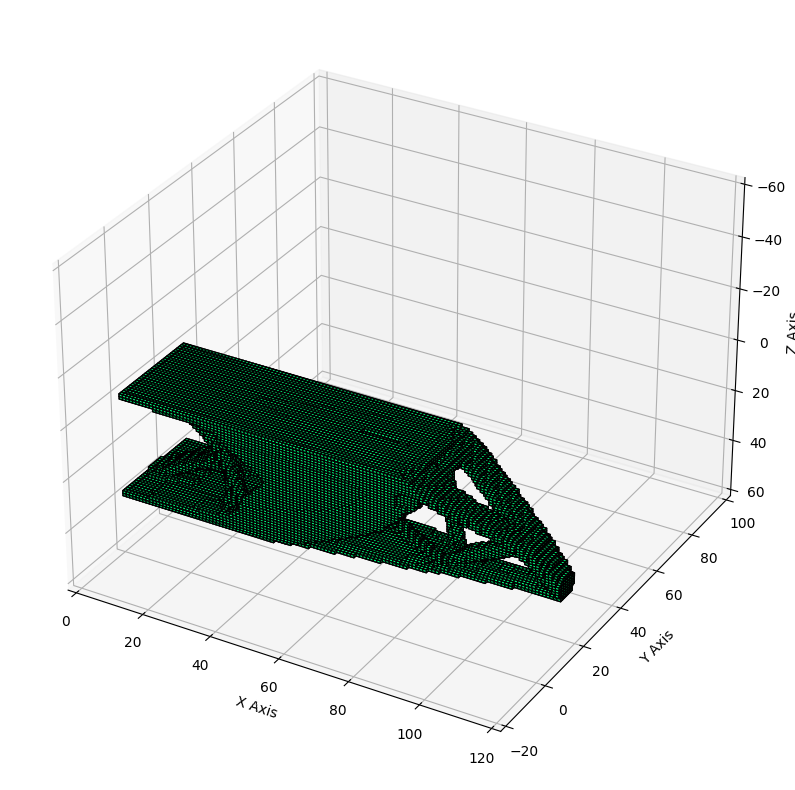

In [37]:
import numpy as np

import matplotlib.pyplot as plt
model_data = np.load('../top_original_files/test_data/top3d_Cantilever_new_label.npy')
print(model_data)

model_data = model_data.transpose(1, 2, 0)   #(x, z, y)
#print(label_3.shape)
mycolormap = plt.get_cmap('winter')
model_data_max=model_data.max()
relativevalue=np.round(model_data/model_data_max,1)
colorsvalues=mycolormap(relativevalue)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 120)   #设置每个轴的刻度大小
ax.set_ylim(-20, 100)
ax.set_zlim(60, -60)
ax.voxels(model_data, facecolors=colorsvalues, edgecolor='k', shade=False)

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef1564490>,
 (0, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef157b610>,
 (0, 0, 35): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef157b9d0>,
 (0, 0, 39): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef157bd90>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a24190>,
 (0, 1, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a24550>,
 (0, 1, 35): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a24910>,
 (0, 1, 39): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a24cd0>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a300d0>,
 (0, 2, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a30490>,
 (0, 2, 35): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a30850>,
 (0, 2, 39): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a30c10>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x24ef5a30fd0>,
 (0, 3

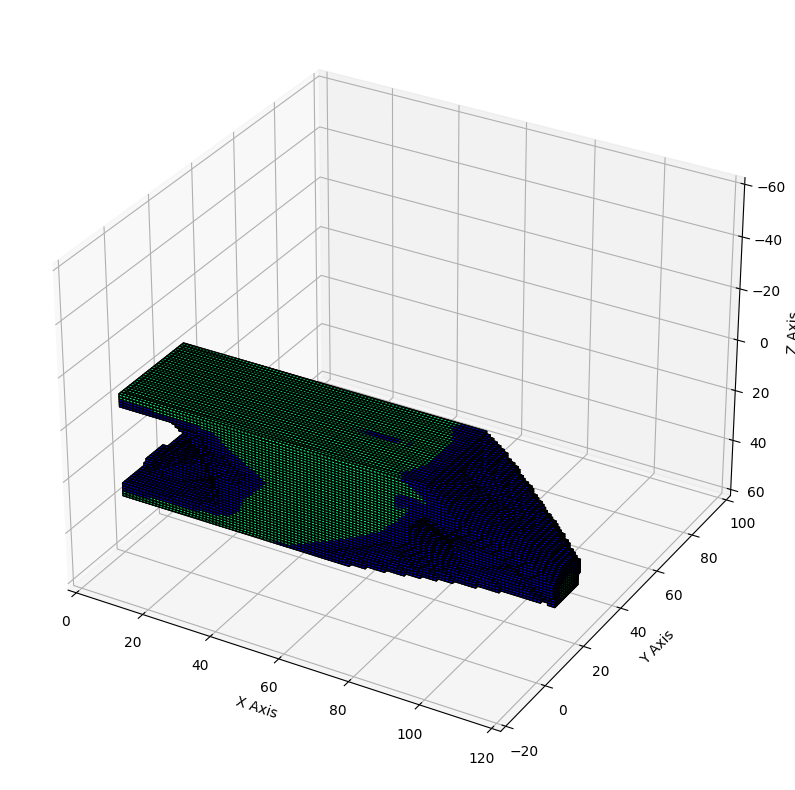

In [7]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np
data = io.loadmat('../top_original_files/test_data/top3d_Cantilever_new.mat')
data = data['ans']


data = data.transpose(1, 2, 0)   #(x, z, y)
#print(label_3.shape)
mycolormap = plt.get_cmap('winter')
data_max=data.max()
relativevalue=np.round(data/data_max,1)
colorsvalues=mycolormap(relativevalue)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 120)   #设置每个轴的刻度大小
ax.set_ylim(-20, 100)
ax.set_zlim(60, -60)
ax.voxels(data, facecolors=colorsvalues, edgecolor='k', shade=False)

__4.1  制作数据集__

In [1]:
import os
import glob
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class test1(Dataset):
    def __init__(self, path):
        self.path = path     #输入存储数据集的文件夹的路径
        self.data_path = glob.glob(os.path.join(path,'data/*.npy'))  #读取数据集文件夹"data"中所有格式为.npy的文件
    def __getitem__(self, index):#用于通过键值对的方式访问属性
        self.data = self.data_path[index]     #生成键值对访问index
        self.label = self.data.replace('data', 'label')#交换路径标签，读取label数据
        image = np.load(self.data)            #按照上一步生成的index依次读取.py文件数据，生成数据集
        image = image.transpose(2, 0, 1)
        image = image[np.newaxis,:,:,:]
        tensor_image = torch.from_numpy(image)
        label = np.load(self.label)
        label = label.transpose(2, 0, 1)
        label = label[np.newaxis,:,:,:]
        tensor_label = torch.from_numpy(image)

        return tensor_image, tensor_label                           
        #return self.data_list[index]  #生成数据文件地址键值对
        
    def __len__(self):
        return len(self.data_path)               

if __name__ == "__main__":
    isbi_dataset = test1('../top_original_files/topfiles/')
    print(isbi_dataset[0])
    print("数据个数：", len(isbi_dataset))
    train_loader = torch.utils.data.DataLoader(dataset=isbi_dataset,
                                               batch_size=1, 
                                               shuffle=True)
    for image, label in train_loader:
        print(image.shape)
        
        print(label.shape)

(tensor([[[[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [9.0476e-73, 1.2468e-70, 1.1405e-72,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [1.6240e-72, 1.0783e-70, 2.2291e-73,  ..., 2.4665e-23,
           9.0112e-01, 1.5479e-12],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.9464e-52,
           4.9810e-14, 1.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.9131e-28,
           4.4882e-13, 1.0000e+00]],

         [[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [5.1800e-75, 2.0391e-73, 2.5827e-78,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [1.5953e-74, 4.2400e-73, 1.0160e-78,  ..., 2.399

注意：输入数据集data中每个文件的名称一定要和标签数据集label中的文件名称对应相同，最好都命名为从0.npy,1.npy开始的文件，避免读入数据时因为文件名出错（如不这样命名，在replace()时容易出错）

__自制数据集时所参考的代码__

In [5]:
import torch
import cv2
import os
import glob
from torch.utils.data import Dataset
import random

class ISBI_Loader(Dataset):
    def __init__(self, data_path):
        # 初始化函数，读取所有data_path下的图片
        self.data_path = data_path
        self.imgs_path = glob.glob(os.path.join(data_path, 'image/*.png'))

    def augment(self, image, flipCode):
        # 使用cv2.flip进行数据增强，filpCode为1水平翻转，0垂直翻转，-1水平+垂直翻转
        flip = cv2.flip(image, flipCode)
        return flip
        
    def __getitem__(self, index):
        # 根据index读取图片
        image_path = self.imgs_path[index]
        # 根据image_path生成label_path
        label_path = image_path.replace('image', 'label')
        # 读取训练图片和标签图片
        image = cv2.imread(image_path)
        label = cv2.imread(label_path)
        # 将数据转为单通道的图片
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
        image = image.reshape(1, image.shape[0], image.shape[1])
        label = label.reshape(1, label.shape[0], label.shape[1])
        # 处理标签，将像素值为255的改为1
        if label.max() > 1:
            label = label / 255
        # 随机进行数据增强，为2时不做处理
        flipCode = random.choice([-1, 0, 1, 2])
        if flipCode != 2:
            image = self.augment(image, flipCode)
            label = self.augment(label, flipCode)
        return image, label

    def __len__(self):
        # 返回训练集大小
        return len(self.imgs_path)

    
if __name__ == "__main__":
    isbi_dataset = ISBI_Loader("../data/train/")
    print("数据个数：", len(isbi_dataset))
    train_loader = torch.utils.data.DataLoader(dataset=isbi_dataset,
                                               batch_size=2, 
                                               shuffle=True)
    for image, label in train_loader:
        print('image:',image.shape)
        print('label:',label.shape)

数据个数： 30
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([2, 1, 512, 512])
image: torch.Size([2, 1, 512, 512])
label: torch.Size([

In [31]:
import torch
import torch.nn.functional as F
x1 = torch.randn((1, 1, 2, 7, 5))
print(x1.shape)
print('x1',x1)
x2 = torch.randn((1, 1, 5, 2, 3))
print(x2.shape)
#print('x2',x2)
diffY = torch.tensor(x2.size()[3] - x1.size()[3])
print(diffY)
diffX = torch.tensor(x2.size()[4] - x1.size()[4])#特征融合部分
print(diffX)
x3 = F.pad(x1, (diffX // 2, diffX - diffX // 2,
                              diffY // 2, diffY - diffY // 2))
print('X3',x3)
output = torch.cat([x3, x2], dim = 2)
print(output.shape)

torch.Size([1, 1, 2, 7, 5])
x1 tensor([[[[[-0.3252,  0.6959, -1.0510,  1.0244,  0.5748],
           [-1.3765,  0.8511, -0.7712,  0.1320,  0.7183],
           [-0.9567,  0.7888,  0.0859,  1.0078, -0.3818],
           [ 0.0993, -0.1794,  0.6995, -1.9373, -1.1174],
           [-2.7730,  1.1956, -0.8276,  1.3754,  0.0322],
           [ 0.2495,  0.5561,  0.3138,  0.9562,  2.0372],
           [ 0.7394, -0.8300,  0.2636, -0.0663,  0.7568]],

          [[ 0.8652, -1.9794,  1.7002,  0.7537,  0.9759],
           [-0.2197,  0.2987, -0.0613,  0.6946,  0.0310],
           [-0.3858, -2.0954,  0.5298, -0.6362,  0.2330],
           [ 1.3995,  0.3642, -0.1333, -0.6659,  2.1316],
           [-0.1671, -1.1634,  0.7314, -1.1221, -1.2737],
           [ 1.0216,  0.0469,  0.9888,  0.6139,  0.6288],
           [ 0.7385,  0.4409, -0.6241, -0.1682, -1.0163]]]]])
torch.Size([1, 1, 5, 2, 3])
tensor(-5)
tensor(-2)
X3 tensor([[[[[-0.1794,  0.6995, -1.9373],
           [ 1.1956, -0.8276,  1.3754]],

          [[ 0.3